In [64]:
from importlib import reload
import numpy as np
from numpy import transpose, trace, multiply, power, dot
from numpy.linalg import multi_dot, matrix_power, norm
import scipy.stats as ss
from scipy.special import comb
import math
import pandas as pd
import time
from tqdm import tqdm
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import pickle
import data_gen as dg
import stat_test as st
import visualizations as viz

In [65]:
# Reload modules in case of modifications
reload(dg)
reload(st)
reload(viz)

<module 'visualizations' from '/Users/louis.cammarata/Dropbox (MIT)/SBMtesting/Simulations-Python/visualizations.py'>

# Case 1: Phase transition in the symmetric case by varying n

In [68]:
# Test parameters
N_rep = 100
level = 0.05

In [69]:
# Data generation parameters
K = 5
exact = True
a = 0.2
b = 0.1

In [74]:
# Initialize error dataframes
range_n = np.arange(10,800,50)
power_PET = np.zeros(len(range_n))

In [79]:
# Read pickles
power_PET = pickle.load(open('exp3_case1_n_power_PET.pkl', 'rb'))

In [80]:
# Compute upper and lower confidence bound on power estimate
std_error = power_PET*(1-power_PET)
q = ss.norm.ppf(q=1-level/2, loc=0, scale=1)
ucb = power_PET+std_error*q/math.sqrt(N_rep)
lcb = power_PET-std_error*q/math.sqrt(N_rep)

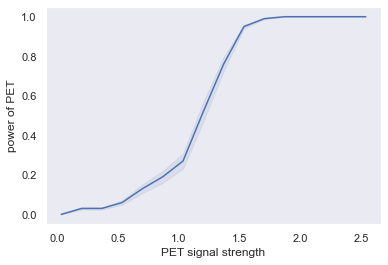

In [82]:
# Plot power as a function of phase transition parameter
range_rho = (a-b)**2/(K*a+K*(K-1)*b)*range_n
fig, ax = plt.subplots()
ax.plot(range_rho,power_PET)
ax.fill_between(range_rho, lcb, ucb, color='b', alpha=.1)
ax.set_xlabel('PET signal strength')
ax.set_ylabel('power of PET')
# Save figure to file
plt.savefig('exp3_case1_n_powerplot_rho.pdf', format='pdf')

# Case 1: Phase transition in the symmetric case by varying b

In [140]:
# Test parameters
N_rep = 500
level = 0.05

In [141]:
# Data generation parameters
K = 5
exact = True
a = 0.2
n = 300

In [142]:
# Initialize error dataframes
range_b = a-np.arange(0,0.15,0.01)
power_PET = np.zeros(len(range_b))

In [143]:
# Run simulations
np.random.seed(seed=13)
for k in tqdm(range(N_rep)):
    time.sleep(0.01)
    for i in range(len(range_b)):
        A = dg.sample_alt_adj_matrix_sym(n, K, a, range_b[i], exact)
        power_PET[i] += st.PET_test(A, level)['reject']
power_PET = power_PET/N_rep

100%|██████████| 500/500 [01:57<00:00,  4.25it/s]


In [144]:
# Save to pickle
pickle.dump(power_PET, open('exp3_case1_b_power_PET.pkl', 'wb'))

In [145]:
# Read pickles
power_PET = pickle.load(open('exp3_case1_b_power_PET.pkl', 'rb'))

In [146]:
# Compute upper and lower confidence bound on power estimate
std_error = power_PET*(1-power_PET)
q = ss.norm.ppf(q=1-level/2, loc=0, scale=1)
ucb = power_PET+std_error*q/math.sqrt(N_rep)
lcb = power_PET-std_error*q/math.sqrt(N_rep)

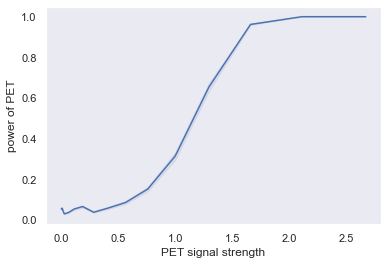

In [147]:
# Plot power as a function of phase transition parameter
range_rho = (a-range_b)**2/(K*a+K*(K-1)*range_b)*n
fig, ax = plt.subplots()
ax.plot(range_rho,power_PET)
ax.fill_between(range_rho, lcb, ucb, color='b', alpha=.1)
ax.set_xlabel('PET signal strength')
ax.set_ylabel('power of PET')
# Save figure to file
plt.savefig('exp3_case1_b_powerplot_rho.pdf', format='pdf')

# Case 2: phase transition in the rank-1 case by varying n

In [192]:
# Test parameters
N_rep = 500
level = 0.05

In [193]:
# Data generation parameters
K = 2
exact = True
b = 1
c = 0.06

In [194]:
# Initialize error dataframes
range_n = np.arange(50,1100,50)
power_PET = np.zeros(len(range_n))

In [195]:
# Run simulations
np.random.seed(seed=13)
for k in tqdm(range(N_rep)):
    time.sleep(0.01)
    for i in range(len(range_n)):
        n = range_n[i]
        a = b+1/n**0.25
        eta = np.concatenate((np.repeat(a,int(K/2)),np.repeat(b,int(K/2)))).reshape((K,1))
        eta = eta/norm(eta)
        A = dg.sample_alt_adj_matrix_rank1(n, K, eta, c, exact)
        power_PET[i] += st.PET_test(A, level)['reject']
power_PET = power_PET/N_rep

100%|██████████| 500/500 [23:02<00:00,  2.76s/it]


In [196]:
# Save to pickle
pickle.dump(power_PET, open('exp3_case2_n_power_PET.pkl', 'wb'))

In [197]:
# Read pickles
power_PET = pickle.load(open('exp3_case2_n_power_PET.pkl', 'rb'))

In [198]:
# Compute upper and lower confidence bound on power estimate
std_error = power_PET*(1-power_PET)
q = ss.norm.ppf(q=1-level/2, loc=0, scale=1)
ucb = power_PET+std_error*q/math.sqrt(N_rep)
lcb = power_PET-std_error*q/math.sqrt(N_rep)

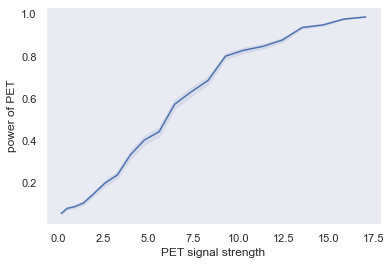

In [199]:
# Plot power as a function of phase transition parameter
range_rho = c*(range_n**1.5)/4/K**2*(a-b)**2/(a+b)**2*(a-b+(5*a**2+6*a*b+5*b**2)**0.5)**2
fig, ax = plt.subplots()
ax.plot(range_rho,power_PET)
ax.fill_between(range_rho, lcb, ucb, color='b', alpha=.1)
ax.set_xlabel('PET signal strength')
ax.set_ylabel('power of PET')
# Save figure to file
plt.savefig('exp3_case2_n_powerplot_rho.pdf', format='pdf')

# Case 2: phase transition in the rank-1 case by varying c

In [239]:
# Test parameters
N_rep = 500
level = 0.05

In [240]:
# Data generation parameters
K = 2
n = 300
exact = True
b = 1
a = b+1/n**0.25
eta = np.concatenate((np.repeat(a,int(K/2)),np.repeat(b,int(K/2)))).reshape((K,1))
eta = eta/norm(eta)

In [241]:
# Initialize error dataframes
range_c = np.arange(0.002,0.31,0.005)
power_PET = np.zeros(len(range_c))

In [ ]:
# Run simulations
np.random.seed(seed=13)
for k in tqdm(range(N_rep)):
    time.sleep(0.01)
    for i in range(len(range_c)):
        c = range_c[i]
        A = dg.sample_alt_adj_matrix_rank1(n, K, eta, c, exact)
        power_PET[i] += st.PET_test(A, level)['reject']
power_PET = power_PET/N_rep

 14%|█▎        | 68/500 [01:23<08:54,  1.24s/it]

In [235]:
# Save to pickle
pickle.dump(power_PET, open('exp3_case2_c_power_PET.pkl', 'wb'))

In [236]:
# Read pickles
power_PET = pickle.load(open('exp3_case2_c_power_PET.pkl', 'rb'))

In [237]:
# Compute upper and lower confidence bound on power estimate
std_error = power_PET*(1-power_PET)
q = ss.norm.ppf(q=1-level/2, loc=0, scale=1)
ucb = power_PET+std_error*q/math.sqrt(N_rep)
lcb = power_PET-std_error*q/math.sqrt(N_rep)

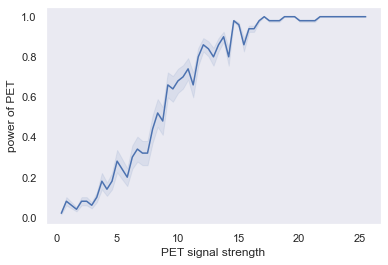

In [238]:
# Plot power as a function of phase transition parameter
range_rho = range_c*(n**1.5)/4/K**2*(a-b)**2/(a+b)**2*(a-b+(5*a**2+6*a*b+5*b**2)**0.5)**2
fig, ax = plt.subplots()
ax.plot(range_rho,power_PET)
ax.fill_between(range_rho, lcb, ucb, color='b', alpha=.1)
ax.set_xlabel('PET signal strength')
ax.set_ylabel('power of PET')
# Save figure to file
plt.savefig('exp3_case2_c_powerplot_rho.pdf', format='pdf')